In [1]:
from pylab import *
from utility_bfsolver3D import *

%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=12)

In [16]:
# defining bfCalc
tb = BFCalc3D_Toolbox()
df_acc = tb.IO_LoadAccTableIntoDf()
usetag = "1b"

a_e   = df_acc.loc[(df_acc.sel=="ee")   & (df_acc.tag==usetag),'acc'].values[0]
a_m   = df_acc.loc[(df_acc.sel=="emu2")  & (df_acc.tag==usetag),'acc'].values[0]
a_t   = df_acc.loc[(df_acc.sel=="etau") & (df_acc.tag==usetag),'acc'].values[0]
a_h   = df_acc.loc[(df_acc.sel=="e4j")  & (df_acc.tag==usetag),'acc'].values[0]


# 1. Load the yields data

In [17]:
bf  = BFCalc3D_ThreeSelectorRatios(a_e, a_m, a_t, a_h, xs=832+35.85*2, lumin=35847)

# 2. uncertainty due to Acceptance

In [18]:
# analytical error propagation
norm = 0
norm = bf.BFCalc3D_N_e.PredictYield()
norm+= bf.BFCalc3D_N_m.PredictYield()
norm+= bf.BFCalc3D_N_t.PredictYield()
norm+= bf.BFCalc3D_N_h.PredictYield()
x1,x2,x3 = bf.PredictXs()

ep = BFCalc3D_ErrorPropagater(bf,x1,x2,x3,norm,usetag,trigger="e")

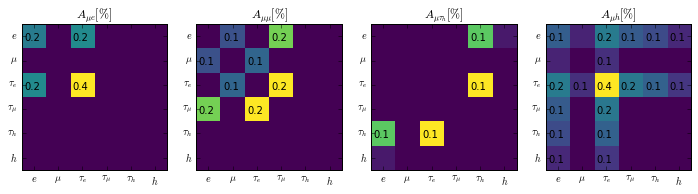

In [19]:
plt.rc("figure",facecolor="w")
tb.Plot_Imshow4Matrix(10*ep.var_a[0]**0.5,
                      10*ep.var_a[1]**0.5,
                      10*ep.var_a[2]**0.5,
                      10*ep.var_a[3]**0.5)

[0.000302   0.00054021 0.00065832]


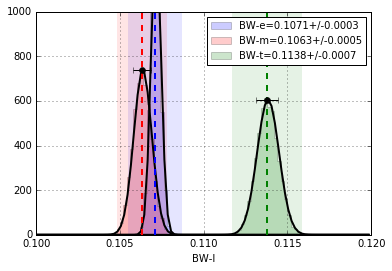

In [20]:
bf1_list, bf2_list, bf3_list = [],[],[]

for i in range(10000):
    _a  = ep.a_fluctuated()
    _bf = BFCalc3D_ThreeSelectorRatios(_a[0],_a[1],_a[2],_a[3],xs=832+35.85*2,lumin=35847)
    _bf1,_bf2,_bf3  = _bf.SovleBF(ep.x1,ep.x2,ep.x3)
    
    bf1_list.append(_bf1)
    bf2_list.append(_bf2)
    bf3_list.append(_bf3)

bf1_list = np.array(bf1_list)
bf2_list = np.array(bf2_list)
bf3_list = np.array(bf3_list)

delta_bf_toy = np.array([bf1_list.std(),bf2_list.std(),bf3_list.std()])
print(delta_bf_toy)
tb.Plot_toy( bf1_list,bf2_list,bf3_list)
#plt.savefig("../plot/detlaa_1b_mu.png",dpi=300)

In [21]:
print(np.dot(ep.var_a_vec,ep.grad2_g_a().T)**0.5)

[0.00030292 0.0005381  0.00066262]


# 2. uncertainty due to Tau decay Br

[4.37176161e-05 1.24815608e-04 1.27098052e-04]


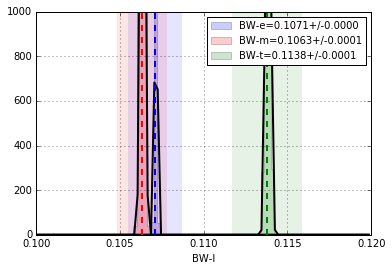

In [22]:
bf1_list, bf2_list, bf3_list = [],[],[]

for i in range(10000):
    _Bt_e = 0.1785 + np.random.normal( 0,0.0005)
    _Bt_m = 0.1736 + np.random.normal( 0,0.0005)
    _bf = BFCalc3D_ThreeSelectorRatios(a_e, a_m, a_t, a_h,
                                       xs=832+35.85*2,lumin=35847,
                                       Bt_e=_Bt_e, Bt_m=_Bt_m,)
    _bf1,_bf2,_bf3  = _bf.SovleBF(ep.x1,ep.x2,ep.x3)
    
    bf1_list.append(_bf1)
    bf2_list.append(_bf2)
    bf3_list.append(_bf3)

bf1_list = np.array(bf1_list)
bf2_list = np.array(bf2_list)
bf3_list = np.array(bf3_list)

delta_bf_toy = np.array([bf1_list.std(),bf2_list.std(),bf3_list.std()])
print(delta_bf_toy)
tb.Plot_toy( bf1_list,bf2_list,bf3_list)

In [15]:
print(np.dot(np.array([0.0005,0.0005])**2,ep.grad2_g_Bt().T)**0.5)

[4.28268933e-05 1.23506074e-04 1.30138762e-04]
